<a href="https://colab.research.google.com/github/garkul/Structural_bioinformatics.msu/blob/main/prak3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prody

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 15.8 MB/s 
     |████████████████████████████████| 3.0 MB 40.3 MB/s 
  Created wheel for prody: filename=ProDy-2.3.1-cp37-cp37m-linux_x86_64.whl size=11753484 sha256=d3a4bee67cf87d5dd99d87670cff9b80f42427450815ef736af662478e6259e9
  Stored in directory: /root/.cache/pip/wheels/79/8a/0c/87245ad587e5ebf6e9b97bdf5fb340e466ca82811a1ee7a8e4
Successfully built prody


In [ ]:
import prody as p
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/Bio/pairwise2.py:283: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  BiopythonDeprecationWarning,


In [ ]:
p1 = p.parsePDB('5vm0')
p2 = p.parsePDB('5vlv')

@> Connecting wwPDB FTP server RCSB PDB (USA).
DEBUG:.prody:Connecting wwPDB FTP server RCSB PDB (USA).
@> 5vm0 downloaded (5vm0.pdb.gz)
DEBUG:.prody:5vm0 downloaded (5vm0.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
DEBUG:.prody:PDB download via FTP completed (1 downloaded, 0 failed).
@> 2137 atoms and 1 coordinate set(s) were parsed in 0.03s.
DEBUG:.prody:2137 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Connecting wwPDB FTP server RCSB PDB (USA).
DEBUG:.prody:Connecting wwPDB FTP server RCSB PDB (USA).
@> 5vlv downloaded (5vlv.pdb.gz)
DEBUG:.prody:5vlv downloaded (5vlv.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
DEBUG:.prody:PDB download via FTP completed (1 downloaded, 0 failed).
@> 1003 atoms and 1 coordinate set(s) were parsed in 0.02s.
DEBUG:.prody:1003 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [ ]:
site = p1.select('within 5 of resnum 202 and not resnum 202 and protein and chain A')
site

<Selection: 'within 5 of res...ein and chain A' from 5vm0 (81 atoms)>

In [ ]:
nums = np.unique(site.getResnums())
nums

array([  3,   4,  26,  29,  30,  31,  32,  34,  35,  36,  74,  75,  76,
        79,  80,  81, 100, 101, 102, 114, 115])

In [ ]:
#нормализируем и стандартизуем на средний B-фактор и стандартное отклонение двух структур
mean_p1 = np.mean(p1.getBetas())
mean_p2 = np.mean(p2.getBetas())
sd_p1 = np.std(p1.getBetas())
sd_p2 = np.std(p2.getBetas())

z_p1 =[]
z_p2 =[]
for res in nums:
  res1 = p1.select('resnum {} and protein and chain A'.format(res))
  res2 = p2.select('resnum {} and protein and chain A'.format(res))
  z_p1.append((np.mean(res1.getBetas()) - mean_p1)/sd_p1)
  z_p2.append((np.mean(res2.getBetas()) - mean_p2)/sd_p2)

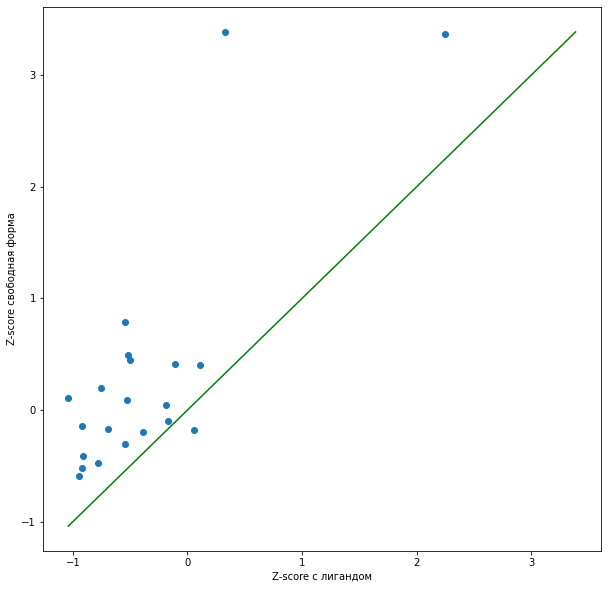

In [ ]:
#plt.scatter(x=z_p1, y=z_p2, c ="blue")
f, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x=z_p1, y=z_p2)
plt.plot([min(min(z_p1), min(z_p2)),max(max(z_p1), max(z_p2))],[min(min(z_p1), min(z_p2)),max(max(z_p1), max(z_p2))], c="green")
plt.xlabel('Z-score с лигандом')
plt.ylabel('Z-score свободная форма')
plt.show()

In [ ]:
print(z_p1)

[2.2472851013823707, -0.1059129680705166, -0.19007618424118147, 0.3299823697675504, -0.5178032107086591, -0.5268220264052502, -0.7560115180763608, -0.922534187278373, -0.945053333275429, -0.5486252457954632, -1.040454991198847, -0.5020900163506798, -0.5452625602178685, 0.1117989700623203, -0.6916711009419155, -0.9097962723254553, -0.9235569395738626, -0.7824847427827565, -0.3887132755215713, 0.05363639002588345, -0.17390275135023278]


In [ ]:
print(z_p2)

[3.3736367687195625, 0.4113028222462544, 0.047138882071328436, 3.388628513033242, 0.4944462258453594, 0.0886011846556196, 0.19760968843452043, -0.14417603448514918, -0.595690906808065, -0.302501009905959, 0.11182365444077584, 0.4456072904605469, 0.7922204708155866, 0.4066490143589191, -0.16590827542171582, -0.40960805113387816, -0.5194240253111422, -0.47117470907352016, -0.19295592902362965, -0.17997388881254156, -0.09683048521343683]
